# Linear Regression with Python

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from linear_regressor import *

### Sample data
Produce some toy data and save in `.csv` and `.npy` format.

In [3]:
x = np.linspace(0, 10, 1000)
y = 2.0*x + 1.0 + np.random.randn(len(x))
sample_data = np.stack((x, y), axis=1)
np.savetxt('sample_data.csv', sample_data.T, delimiter=',')
np.save('sample_data.npy', sample_data)

### Create datasets

In [8]:
dataset = Dataset()
dataset.from_numpy(sample_data)
dataset.test_train_split(0.5)

### Fit model

In [9]:
model = LinearRegressor(dataset)
model.train()

# Predict on training data
y_train_pred = model.predict(test=False)
# Predict on testing data
y_test_pred = model.predict(test=True)

### Plot results

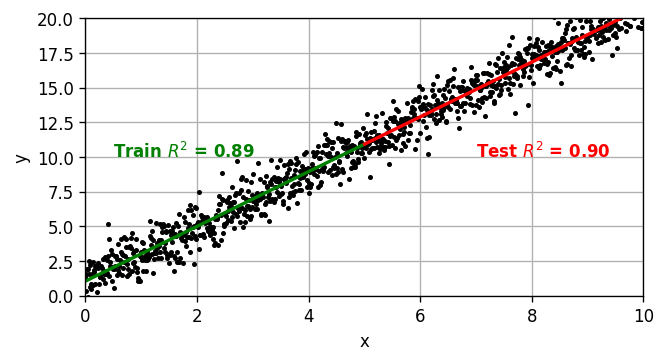

In [39]:
fig, ax = plt.subplots(dpi=120, figsize=(6, 3))
ax.plot(x, y, ls='', c='k', lw=1, ms=2, marker='o', label='data')
ax.plot(dataset.X_train, y_train_pred, 'g', lw=2, label='train')
ax.plot(dataset.X_test, y_test_pred, 'r', lw=2, label='test')

ax.text(0.5, 10, f'Train $R^2$ = {model.score(test=False):.2f}', color='g', weight='bold')
ax.text(7, 10, f'Test $R^2$ = {model.score(test=True):.2f}', color='r', weight='bold')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, 10)
ax.set_ylim(0, 20)

plt.grid()
plt.show()

In [35]:
model.save_coeffs('model_coeffs')

In [37]:
model.thetas

array([[1.04599923],
       [1.97561232]])